# **Petrol & Gas (Oil) Consumption and Prices Worldwide**
* Arsalan Ali
* arslanchaos@gmail.com

----

### **Table of Contents**
1. **Introduction**
    <br>1.1. Dataset
2. **Problem Statement**
3. **Preparing Data**
4. **Exploratory Data Analysis (EDA)**
    * Data Shape
    * Data Structure
    * Type Conversion
    * Number of Unique values
    * Unique values
    * NaN values in Dataset
    * Mean
    * Descriptive Statistics
    * Horizontal and Vertical shif of data
5. **Solution for Problem Statements**

## **1. Introduction**
Petrol & Gas (Oil) production has increased rapidly over the years and in order to keep track of the production<br>
and consumption, Data Analytics is implemented. With Data Analytics we can not only bring insights of<br>
the Upstream and Downstream of Oil Production but can also forecast the Consumption based on the<br>
history.

**Note:** Instead of using words like "Petrol, Fuel and Gas" we'd call it "Oil" for the ease.

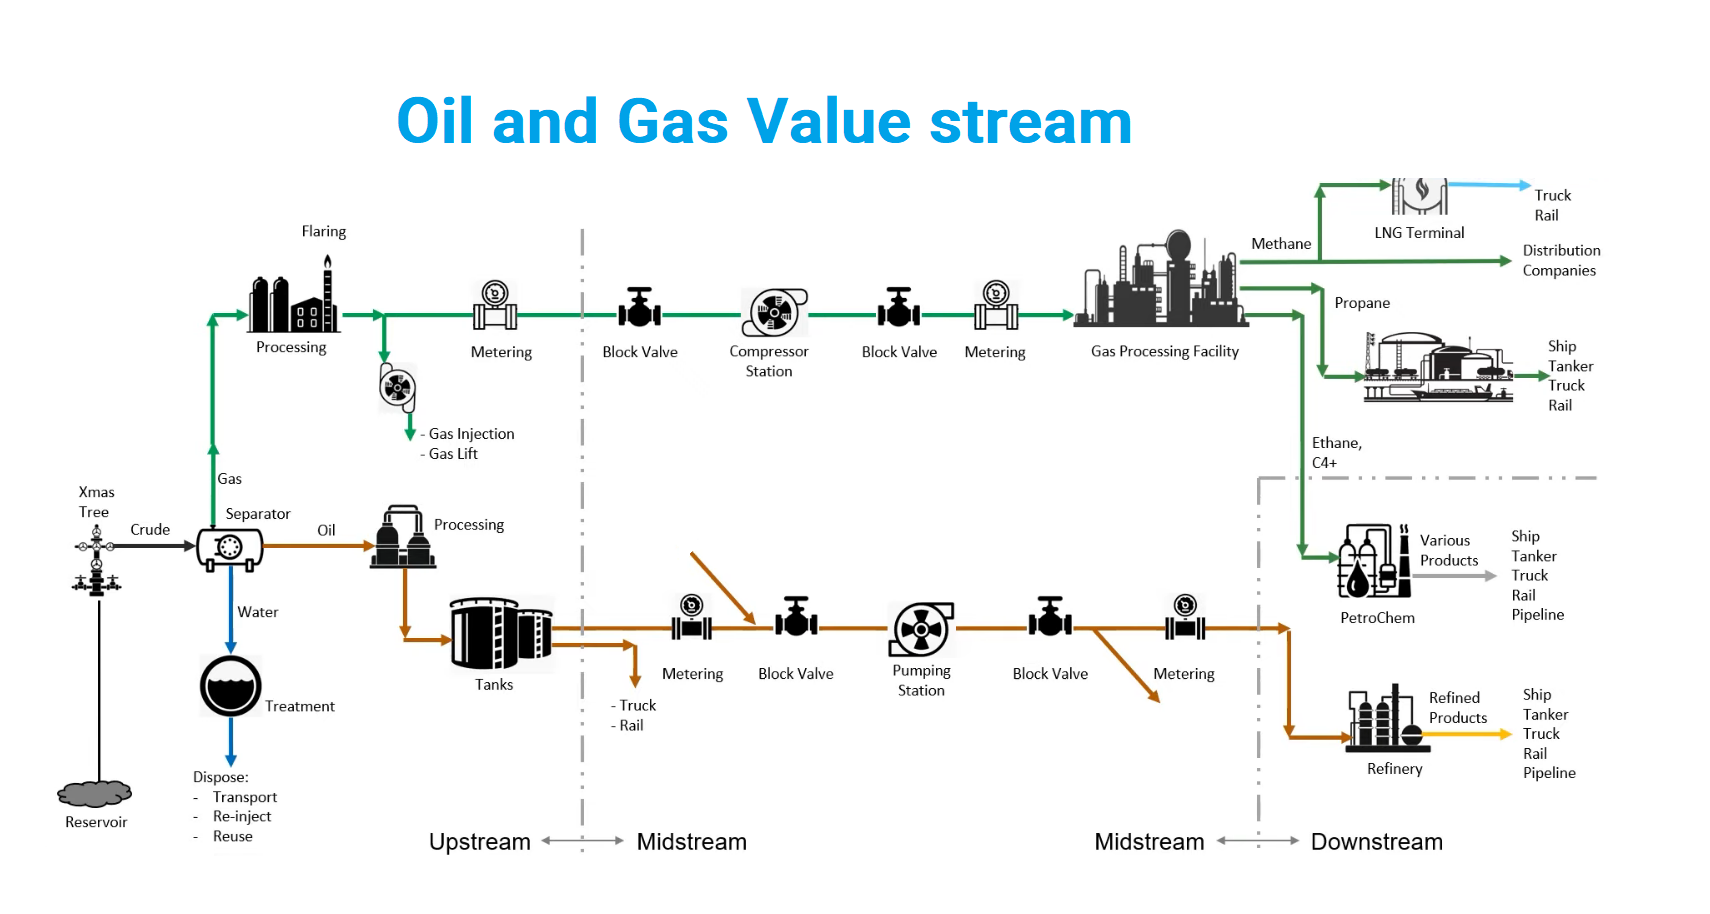

In [4]:
from IPython.display import Image
Image(filename='oil_stream.png')

Today we will be looking at Oil & Gas Consumption and Prices dataset.<br>
We will perform EDA-Analysis of data to give insights about different countries.<br>

### **1.1. Dataset: Petrol/Gas Prices Worldwide**
**Link**: https://www.kaggle.com/datasets/zusmani/petrolgas-prices-worldwide

**The Features:**
1. Serial
2. Country	
3. Daily Oil Consumption (Barrels)
4. World Share	
5. **Yearly Gallons Per Capita:** Gallons of Oil a single person Consumes in a Year
6. Price Per Gallon (USD)	
7. Price Per Liter (USD)	
8. Price Per Liter (PKR)	
9. **GDP Per Capita ( USD ):** Economic activity of a single person (Dollars)
10. **Gallons GDP Per Capita Can Buy:** Gallons of Oil a single person could Buy in a Year
11. xTimes Yearly Gallons Per Capita Buy

## **2. Problem Statement**

1. **Forecast Oil & Gas Consumption along with the prices**<br>
2. **Visualize Top 10 countries with highest "Daily Oil Consumption".**
3. **Visualize Top 10 countries with highest "Share of Oil".**
4. **Visualize Top 10 countries with highest "GDP Per Capita"**
5. **Visualize 10 countries that consumes highest Oil per person**
6. **Which 10 countries can "Buy the Oil" the most?**
7. **Relation between price per liter (USD) and GDP Per Capita?**
8. **Correlation of all features among eachother**


## **3. Preparing Data**

### **3.1 Importing essential libraries**

In [5]:
# For Numeric Computation
import numpy as np

# For Data Analysis
import pandas as pd

# For Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For Interactive Visualization
import plotly.express as px
import plotly.graph_objects as go

### **3.2 Importing Dataset**

In [202]:
# Dataset through Pandas
# Reason for using ISO-8859-1:
#   The dataset exceeds utf-8 (0-127) encoding. It requires a larger-width encodig such as latin-1 or ISO-8859-1 (0-255)
df = pd.read_csv('Petrol Dataset.csv' ,encoding='ISO-8859-1')

# View a sample of Dataset
df.head()

,S#,Country,Daily Oil Consumption (Barrels),World Share,Yearly Gallons Per Capita,Price Per Gallon (USD),Price Per Liter (USD),Price Per Liter (PKR),GDP Per Capita ( USD ),Gallons GDP Per Capita Can Buy,xTimes Yearly Gallons Per Capita Buy
0,1,United States,"19,687,287",20%,934.3,5.19,1.37,289.97,"63,414","12,218",13
1,2,China,"12,791,553",13%,138.7,5.42,1.43,302.87,"10,435","1,925",14
2,3,India,"4,443,000",5%,51.4,5.05,1.33,281.93,"1,901",376,7
3,4,Japan,"4,012,877",4%,481.5,4.69,1.24,262.05,"40,193","8,570",18
4,5,Russia,"3,631,287",4%,383.2,3.41,0.90,190.56,"10,127","2,970",8


## **4. Exploratory Data Analysis (EDA)**

### Data Shape

In [203]:
# Step 1: Data shape
print(df.shape)
rows, columns = df.shape
print(f"Num of Rows: {rows} ") # instances
print(f"Num of Columns: {columns} ") # series
print(f"The size (rows x columns) is: {df.size}") # size
print(f"The Dimensions are: {df.ndim}") # dimensions


(181, 11)
Num of Rows: 181 
Num of Columns: 11 
The size (rows x columns) is: 1991
The Dimensions are: 2


### Data Structure

In [14]:
# Step 2: Data Structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181 entries, 0 to 180
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   S#                                    181 non-null    int64  
 1   Country                               181 non-null    object 
 2   Daily Oil Consumption (Barrels)       181 non-null    object 
 3   World Share                           181 non-null    object 
 4   Yearly Gallons Per Capita             181 non-null    float64
 5   Price Per Gallon (USD)                181 non-null    float64
 6   Price Per Liter (USD)                 181 non-null    float64
 7   Price Per Liter (PKR)                 181 non-null    float64
 8   GDP Per Capita ( USD )                181 non-null    object 
 9   Gallons GDP Per Capita Can Buy        181 non-null    object 
 10  xTimes Yearly Gallons Per Capita Buy  181 non-null    int64  
dtypes: float64(4), int6

### Type Conversion

In [204]:
# Since we've a lot of features in "Object/String" datatype. Let's convert them into Float

# Creating a dictionary of all special characters in our dataset
char = {'%': '',
        ',': '',}

# Looping through all the features one by one
for feature in df.columns:
# Creating a condition to only target "Object" datatype and ignore the rest including the "Country" column
    if df[feature].dtype == "object" and feature != "Country":
# Creating a loop for the dictionary
        for key, value in char.items():
# If the special characters are in the columns then they'd get replaced by '' empty space
            df[feature] = df[feature].str.replace(key, value)
# After removing special character we're converting the features from "Object" to "Float" datatype
        df[feature] = df[feature].astype("float64")

### Checking Type Coversion
We've successfully converted the required features into float datatype

In [205]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181 entries, 0 to 180
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   S#                                    181 non-null    int64  
 1   Country                               181 non-null    object 
 2   Daily Oil Consumption (Barrels)       181 non-null    float64
 3   World Share                           181 non-null    float64
 4   Yearly Gallons Per Capita             181 non-null    float64
 5   Price Per Gallon (USD)                181 non-null    float64
 6   Price Per Liter (USD)                 181 non-null    float64
 7   Price Per Liter (PKR)                 181 non-null    float64
 8   GDP Per Capita ( USD )                181 non-null    float64
 9   Gallons GDP Per Capita Can Buy        181 non-null    float64
 10  xTimes Yearly Gallons Per Capita Buy  181 non-null    int64  
dtypes: float64(8), int6

### Num of Unique values in Dataset

In [96]:
df.nunique()

S#                                      181
Country                                 181
Daily Oil Consumption (Barrels)         156
World Share                               8
Yearly Gallons Per Capita               180
Price Per Gallon (USD)                  156
Price Per Liter (USD)                   118
Price Per Liter (PKR)                   165
GDP Per Capita ( USD )                  178
Gallons GDP Per Capita Can Buy          178
xTimes Yearly Gallons Per Capita Buy     34
dtype: int64

### List of the Countries (Unique values)

In [97]:
df["Country"].unique()

array(['United States', 'China', 'India', 'Japan', 'Russia',
       'Saudi Arabia', 'Brazil', 'South Korea', 'Canada', 'Germany',
       'Mexico', 'Iran', 'France', 'Indonesia', 'United Kingdom',
       'Singapore', 'Italy', 'Spain', 'Thailand', 'Australia', 'Taiwan',
       'Turkey', 'Netherlands', 'Egypt', 'United Arab Emirates', 'Iraq',
       'Malaysia', 'Argentina', 'Belgium', 'South Africa', 'Venezuela',
       'Poland', 'Pakistan', 'Vietnam', 'Nigeria', 'Colombia', 'Algeria',
       'Kuwait', 'Philippines', 'Chile', 'Hong Kong', 'Kazakhstan',
       'Austria', 'Sweden', 'Peru', 'Ukraine', 'Ecuador', 'Greece',
       'Morocco', 'Libya', 'Switzerland', 'Qatar', 'Ireland', 'Denmark',
       'Israel', 'Romania', 'Czech Republic (Czechia)', 'Turkmenistan',
       'Norway', 'New Zealand', 'Cuba', 'Oman', 'Hungary', 'Finland',
       'Portugal', 'Panama', 'Lebanon', 'Bangladesh', 'Angola', 'Syria',
       'Puerto Rico', 'Azerbaijan', 'Belarus', 'Guatemala', 'Kenya',
       'Tunisia', '

### NaN values in Dataset

In [98]:
df.isnull().sum()

S#                                      0
Country                                 0
Daily Oil Consumption (Barrels)         0
World Share                             0
Yearly Gallons Per Capita               0
Price Per Gallon (USD)                  0
Price Per Liter (USD)                   0
Price Per Liter (PKR)                   0
GDP Per Capita ( USD )                  0
Gallons GDP Per Capita Can Buy          0
xTimes Yearly Gallons Per Capita Buy    0
dtype: int64

### Mean of the Dataset

In [99]:
df.mean(numeric_only=True)

S#                                          91.000000
Daily Oil Consumption (Barrels)         533573.049724
World Share                                  0.497238
Yearly Gallons Per Capita                  332.006630
Price Per Gallon (USD)                       5.695691
Price Per Liter (USD)                        1.505138
Price Per Liter (PKR)                      318.219227
GDP Per Capita ( USD )                   15259.790055
Gallons GDP Per Capita Can Buy            4179.342541
xTimes Yearly Gallons Per Capita Buy        14.204420
dtype: float64

### Descriptive Statistics

In [100]:
round(df.describe(),1)

,S#,Daily Oil Consumption (Barrels),World Share,Yearly Gallons Per Capita,Price Per Gallon (USD),Price Per Liter (USD),Price Per Liter (PKR),GDP Per Capita ( USD ),Gallons GDP Per Capita Can Buy,xTimes Yearly Gallons Per Capita Buy
count,181.0,181.0,181.0,181.0,181.0,181.0,181.0,181.0,181.0,181.0
mean,91.0,533573.0,0.5,332.0,5.7,1.5,318.2,15259.8,4179.3,14.2
std,52.4,1858067.1,1.9,436.6,4.4,1.2,244.2,20542.2,15436.4,48.6
min,1.0,51.0,0.0,2.2,0.1,0.0,4.6,274.0,24.0,1.0
25%,46.0,20036.0,0.0,53.9,4.2,1.1,232.0,2033.0,473.0,6.0
50%,91.0,61612.0,0.0,180.2,5.3,1.4,295.0,6127.0,1410.0,9.0
75%,136.0,262352.0,0.0,424.6,6.8,1.8,377.7,20234.0,4103.0,12.0
max,181.0,19687287.0,20.0,3679.5,54.9,14.5,3066.8,115874.0,200700.0,654.0


* **Min Oil Consumed (Barrels) per day: 51 Barrels**
* **Max Oil Consumed (Barrels) per day: 19.6 Million Barrels**
* **Average Oil Consumed (Barrels) per day: 0.5 Million Barrels**
* **Min Oil Price (PKR) per liter: 4.6 PKR**
* **Max Oil Price (PKR) per liter: 3066.8 PKR**
* **Average Oil Price (PKR) per liter: 318.2 PKR**


### Horizontal and Vertical shif of data
**Most of the countries that've close to zero oil consumption (not actual zero) would cause a huge Kurtosis around Zero. Meanwhile countries like United States, China etc<br>
would appear as a rarity when plotted.**

Skew is: 7.930 , Kurtosis is: 72.994


<AxesSubplot:xlabel='Daily Oil Consumption (Barrels)', ylabel='Count'>

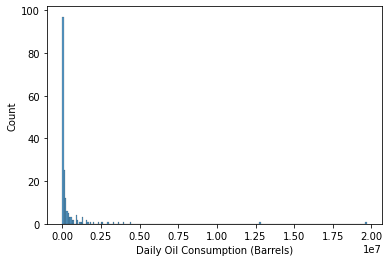

In [116]:
# Measure its skewness and kurtosis
skew, kurtosis = df["Daily Oil Consumption (Barrels)"].agg(["skew", "kurtosis"]).transpose()
print(f"Skew is: {skew:.3f} , Kurtosis is: {kurtosis:.3f}")
sns.histplot(df["Daily Oil Consumption (Barrels)"])

## **5. Solution for Problem Statements**

### **5.1 Forecast Oil & Gas Consumption along with the prices**
**Data is limited and is not based on previous history of all the countries so we can't forecast anything.**

### **5.2 Visualize Top 10 countries with highest "Daily Oil Consumption"**

In [190]:
fig=px.pie(df.head(10),values='Daily Oil Consumption (Barrels)',names='Country',hole=0.5)
fig.update_layout(title='Daily Oil Consumption (Barrels) - Top 10 Countries',font_size=15,title_x=0.45,annotations=[dict(text='Countries',font_size=18, showarrow=False)])
fig.update_traces(textfont_size=15,textinfo='percent')
fig.show()

### **5.3 Visualize Top 10 countries with highest "Share of Oil"**

In [188]:
top_share = df.nlargest(10, 'World Share')

# Create a stacked bar with more customization
fig = px.bar(top_share, x='Country', y='World Share', color='Country', title='Top 10 countries with highest "Share of Oil "',

      labels={'World Share': 'World Shares (%) ', 'Country': 'Country '})
fig.update_layout(font_size=15, title_x=0.45, xaxis_tickangle=-45)

### **5.4 Visualize Top 10 countries with highest "GDP Per Capita (USD)"**

In [228]:
top_share = df.nlargest(10, 'GDP Per Capita ( USD )')

# fig = px.violin(top_share, x="Country", y="GDP Per Capita ( USD )",  color="Country", box=False, points='all')
# fig.show()

fig = px.scatter(top_share, x="Country", y="GDP Per Capita ( USD )", size="GDP Per Capita ( USD )", color="Country", title='Top 10 countries with highest "GDP Per Capita"',
                 hover_name="Country", log_x=False, size_max=600)
fig.update_layout(font_size=15, title_x=0.45, xaxis_tickangle=-45)
fig.show()

### **5.5 Visualize 10 countries that consumes highest Oil per person**

In [206]:
df["Oil usage per person"] = df["Daily Oil Consumption (Barrels)"]/df["GDP Per Capita ( USD )"]

In [257]:
oil_share = df.nlargest(10, "Oil usage per person")
fig = px.bar(oil_share, x='Country', y='Oil usage per person',
             hover_data=['Country', 'GDP Per Capita ( USD )'], color='Country', title='Top 10 countries that consume highest Oil per Person')
fig.update_layout(font_size=15, title_x=0.45, xaxis_tickangle=-45)
fig.show()

### **5.6 Which 10 countries can "Buy the Oil" the most?**

In [259]:
buy_share = df.nlargest(10, "Gallons GDP Per Capita Can Buy")

fig = px.bar(oil_share, x='Gallons GDP Per Capita Can Buy', y='Country',
             hover_data=['Country', 'Gallons GDP Per Capita Can Buy'], color='Country', title='Top 10 countries that can Buy the most Oil')
fig.update_layout(font_size=15, title_x=0.45, xaxis_tickangle=-45)
fig.show()

### **5.7 Relation between Price Per Liter (USD) and GDP Per Capita (USD)?**

In [260]:
fig = px.scatter(df, x="Price Per Liter (USD)", y="GDP Per Capita ( USD )", size = "GDP Per Capita ( USD )",
color = 'Country', title = 'Relation between Price Per Liter (USD) and GDP Per Capita (USD)', range_x=[0,6], log_y=False)
fig.update_layout(font_size=15, title_x=0.45, xaxis_tickangle=-45)
fig.show()

### **5.8 Correlation of all features among eachother**

In [239]:
df.corr()

,S#,Daily Oil Consumption (Barrels),World Share,Yearly Gallons Per Capita,Price Per Gallon (USD),Price Per Liter (USD),Price Per Liter (PKR),GDP Per Capita ( USD ),Gallons GDP Per Capita Can Buy,xTimes Yearly Gallons Per Capita Buy,Oil usage per person
S#,1.000000,-0.414058,-0.406384,-0.188944,0.121811,0.121623,0.121741,-0.269779,-0.160051,-0.109388,-0.361556
Daily Oil Consumption (Barrels),-0.414058,1.000000,0.995882,0.149248,-0.029965,-0.030106,-0.029938,0.190066,0.051464,0.007332,0.487674
World Share,-0.406384,0.995882,1.000000,0.137480,-0.030067,-0.030217,-0.030040,0.181224,0.064107,0.022268,0.504923
Yearly Gallons Per Capita,-0.188944,0.149248,0.137480,1.000000,0.057293,0.057471,0.057368,0.622038,0.150975,-0.025534,-0.081313
Price Per Gallon (USD),0.121811,-0.029965,-0.030067,0.057293,1.000000,0.999997,1.000000,0.182356,-0.127351,-0.144467,-0.090789
Price Per Liter (USD),0.121623,-0.030106,-0.030217,0.057471,0.999997,1.000000,0.999997,0.182663,-0.127428,-0.144567,-0.091177
Price Per Liter (PKR),0.121741,-0.029938,-0.030040,0.057368,1.000000,0.999997,1.000000,0.182437,-0.127275,-0.144409,-0.090822
GDP Per Capita ( USD ),-0.269779,0.190066,0.181224,0.622038,0.182356,0.182663,0.182437,1.000000,0.188181,0.021875,-0.105524
Gallons GDP Per Capita Can Buy,-0.160051,0.051464,0.064107,0.150975,-0.127351,-0.127428,-0.127275,0.188181,1.000000,0.966148,-0.017731
xTimes Yearly Gallons Per Capita Buy,-0.109388,0.007332,0.022268,-0.025534,-0.144467,-0.144567,-0.144409,0.021875,0.966148,1.000000,-0.002056


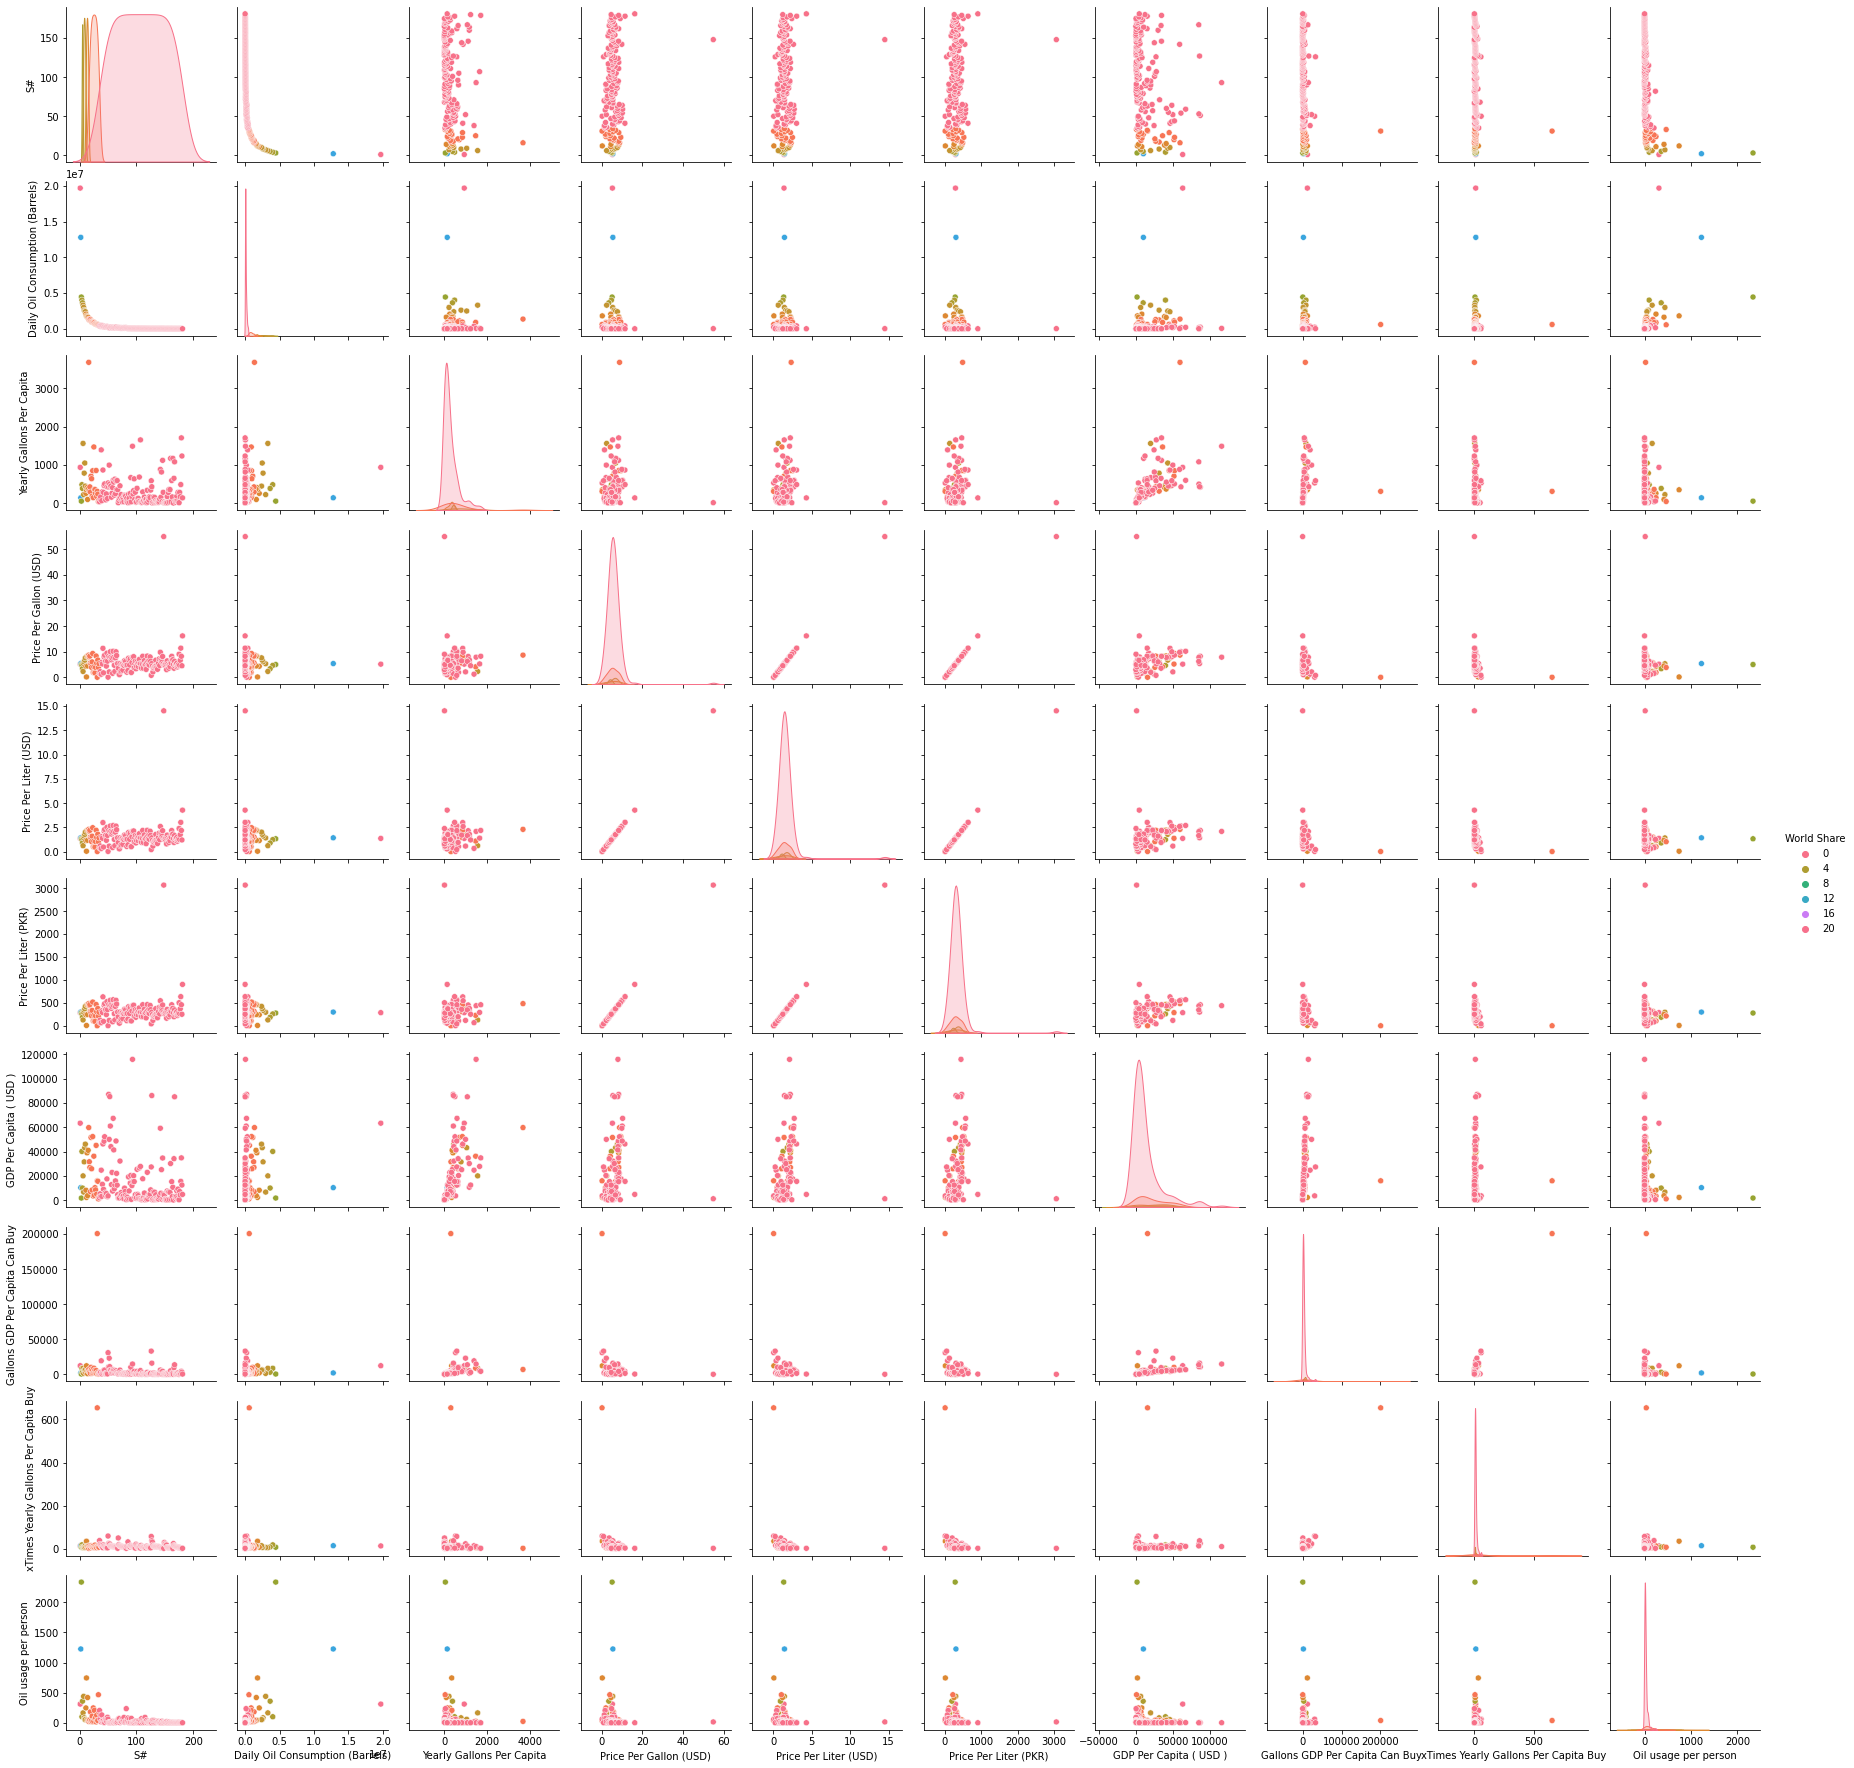

In [238]:
sns.pairplot(df, hue="World Share", palette="husl")

<AxesSubplot:>

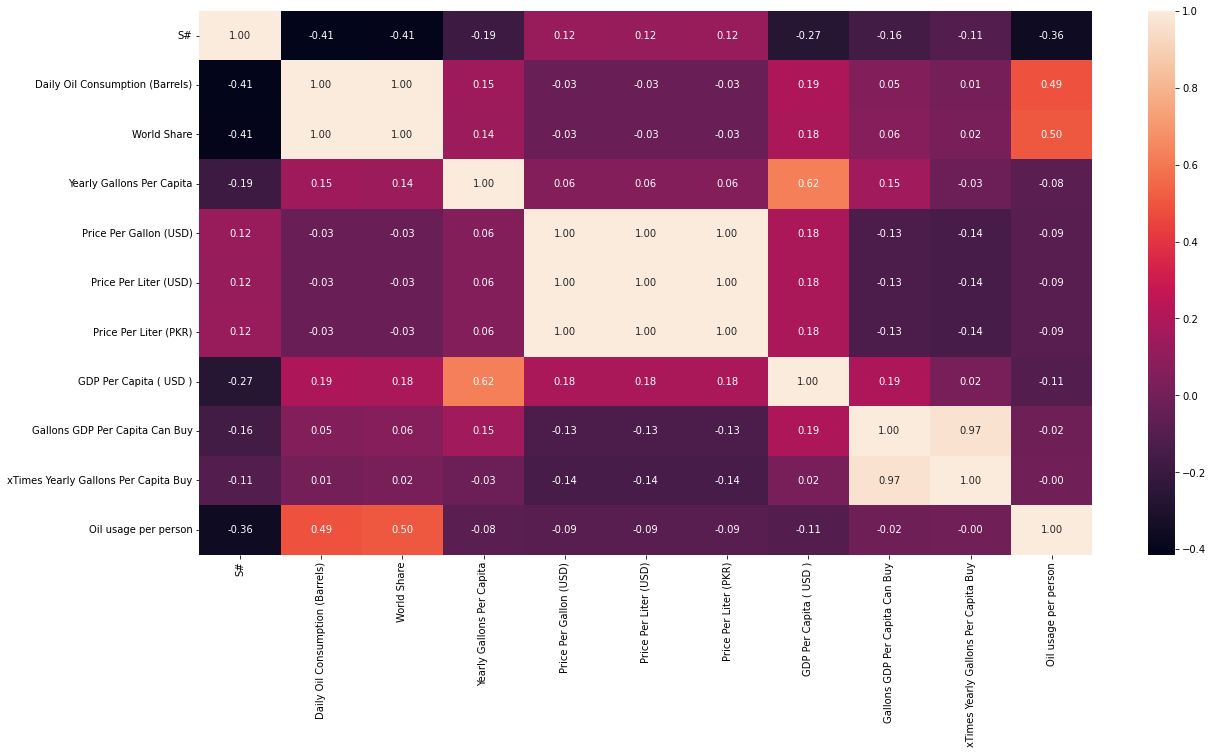

In [255]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True, fmt='.2f')

#### **Results**:

1. Since the data has no prior history that's why we can't consider 1.0 as an accurate positive correlation. It's flawed.
2. Correlations such as "0.97" are also suspicious but they might be usefeul if further data is collected.
3. Correlations "0.49, 0.50, 0.62" are interesting and should be kept a close on to.